In [280]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import graphviz
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from datetime import datetime
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False



# 1. 선형회귀 모델

In [245]:
# 데이터 로드
data = pd.read_csv('last.csv')
data  = data.dropna()

In [246]:
# 날짜 및 요일 전처리
data['날짜'] = pd.to_datetime(data['날짜'])
data['요일'] = data['날짜'].dt.dayofweek
data['월'] = data['날짜'].dt.month
data['주차'] = data['날짜'].dt.isocalendar().week
# 필요한 특성 선택
features = ['요일', '평균기온(℃)', '평균 이동인구',]
target = '합계'

X = data[features]
y = data[target]


In [247]:
# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 학습된 모델의 계수 및 절편 출력
print('계수:', model.coef_)
print('절편:', model.intercept_)


계수: [-5.34918465e+01 -9.71155578e-01  2.08413988e-02]
절편: -396.6865883611381


이 부분이 의미가 있는 결과인지 모르겠습니다

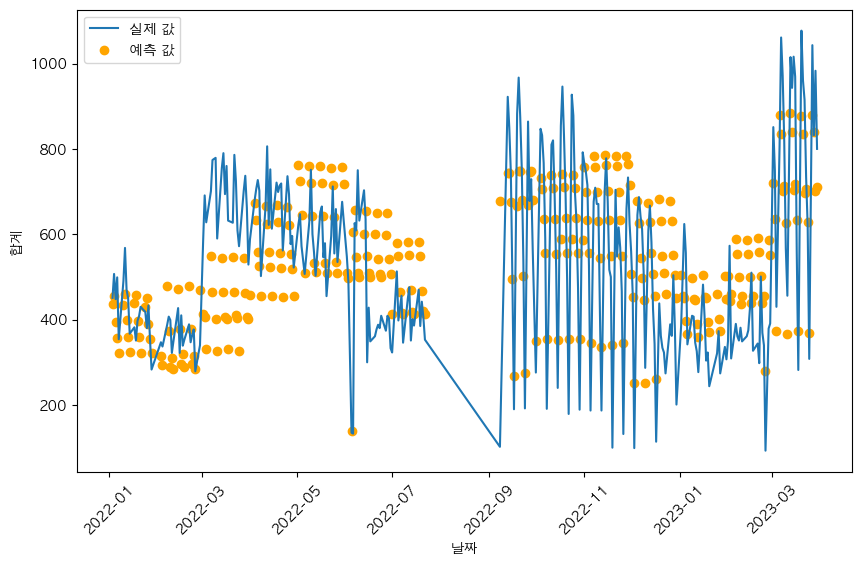

In [248]:
# 예측 결과 계산
predictions = model.predict(X)

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
plt.plot(data['날짜'], y, label='실제 값')
plt.scatter(data['날짜'], predictions, label='예측 값',color = 'orange')
plt.xlabel('날짜')
plt.ylabel('합계')
plt.legend()
plt.xticks(rotation=45)
plt.show()


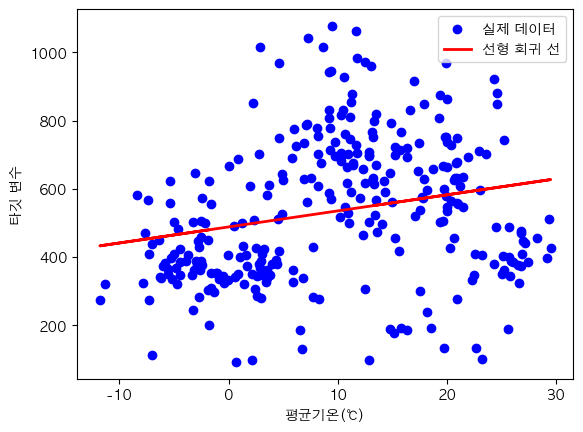

In [249]:

# 입력 데이터와 예측값 추출
X = data['평균기온(℃)']
y = data[target]

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# 예측값 계산
y_pred = model.predict(X.values.reshape(-1, 1))

# 산점도 그리기
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', linewidth=2, label='선형 회귀 선')
plt.xlabel('평균기온(℃)')
plt.ylabel('타깃 변수')
plt.legend()
plt.show()




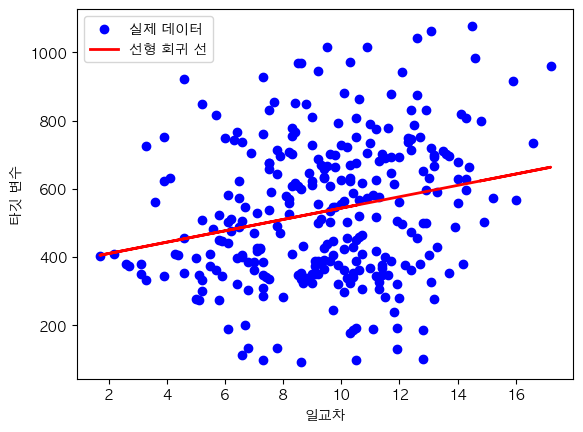

In [250]:

# 입력 데이터와 예측값 추출
X = data['일교차']
y = data[target]

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# 예측값 계산
y_pred = model.predict(X.values.reshape(-1, 1))

# 산점도 그리기
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', linewidth=2, label='선형 회귀 선')
plt.xlabel('일교차')
plt.ylabel('타깃 변수')
plt.legend()
plt.show()


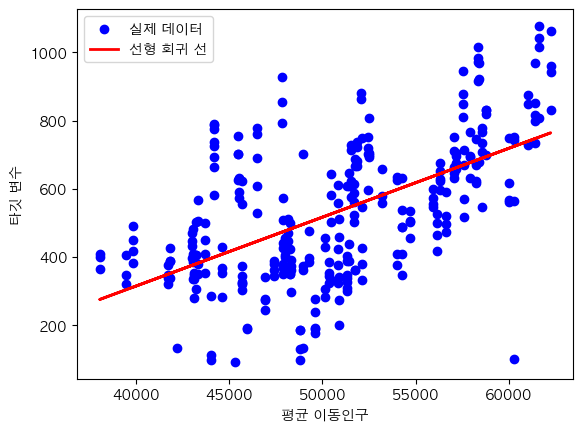

In [251]:

# 입력 데이터와 예측값 추출
X = data['평균 이동인구']
y = data[target]

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# 예측값 계산
y_pred = model.predict(X.values.reshape(-1, 1))

# 산점도 그리기
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', linewidth=2, label='선형 회귀 선')
plt.xlabel('평균 이동인구')
plt.ylabel('타깃 변수')
plt.legend()
plt.show()

In [252]:
# 입력 데이터와 타깃 변수 분리
X = data[['평균기온(℃)', '요일','평균 이동인구','주차','월']]
y = data['합계']

# 트레인셋과 테스트셋으로 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트셋에 대한 예측
y_pred = model.predict(X_test)

# 평균 제곱 오차(Mean Squared Error) 계산
mse = mean_squared_error(y_test, y_pred)
print('평균 제곱 오차:', mse)

평균 제곱 오차: 16786.797389132185


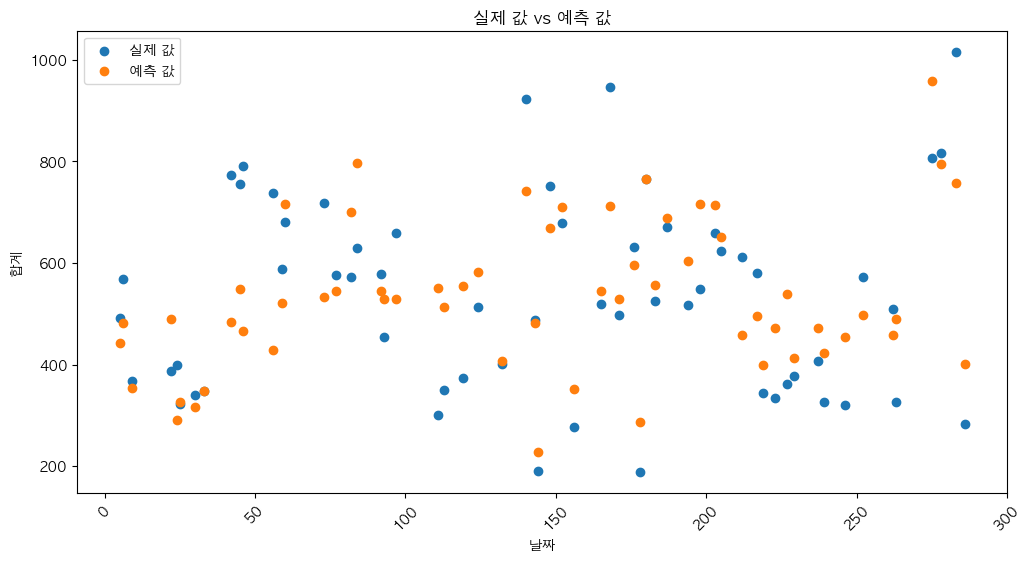

In [253]:

# 예측값과 실제 결과를 가지고 있는 데이터프레임 생성results = pd.DataFrame({'날짜': data.loc[X_test.index, '날짜'], '실제 값': y_test, '예측 값': y_pred})
results = pd.DataFrame({'실제 값': y_test, '예측 값': y_pred})
results['날짜'] = X_test.index  # 인덱스를 '날짜' 열로 설정

# 날짜를 x축으로 설정하여 시각화
plt.figure(figsize=(12, 6))
plt.scatter(results['날짜'], results['실제 값'], label='실제 값', marker='o')
plt.scatter(results['날짜'], results['예측 값'], label='예측 값', marker='o')
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('실제 값 vs 예측 값')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [254]:
X = data[['평균기온(℃)', '요일','평균 이동인구','주차','월','날짜']]
y = data['합계']

# 트레인셋과 테스트셋으로 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared Error:', mse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

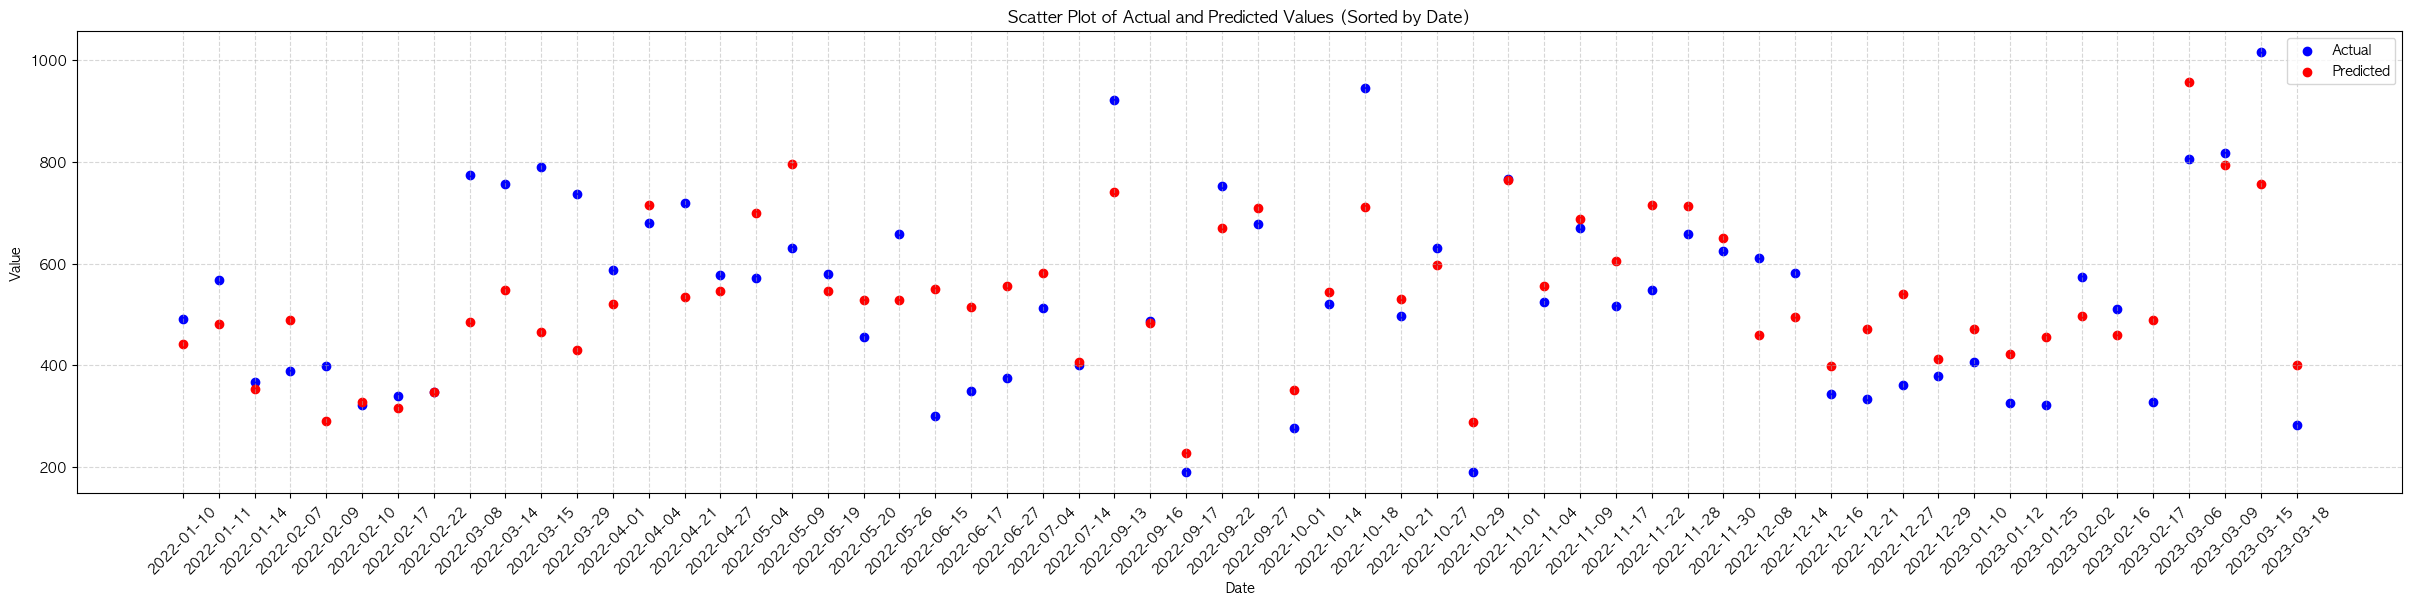

In [255]:
# Convert date column to string format
X_test['날짜'] = X_test['날짜'].astype(str)


df = pd.DataFrame({'Date': X_test['날짜'], 'Actual': y_test.values, 'Predicted':  y_pred})
df_sorted = df.sort_values('Date')
# 정렬된 데이터에서 날짜, 실제 값, 예측 값 추출
sorted_dates = df_sorted['Date']
sorted_actual_values = df_sorted['Actual']
sorted_predicted_values = df_sorted['Predicted']

# 산점도 그리기
plt.figure(figsize=(30, 6))
plt.scatter(sorted_dates, sorted_actual_values, color='blue', label='Actual')
plt.scatter(sorted_dates, sorted_predicted_values, color='red', label='Predicted')

# 축과 제목 설정
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Actual and Predicted Values (Sorted by Date)')

# 격자 추가
plt.grid(axis='both', linestyle='--', alpha=0.5)

# x축 레이블 자동으로 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


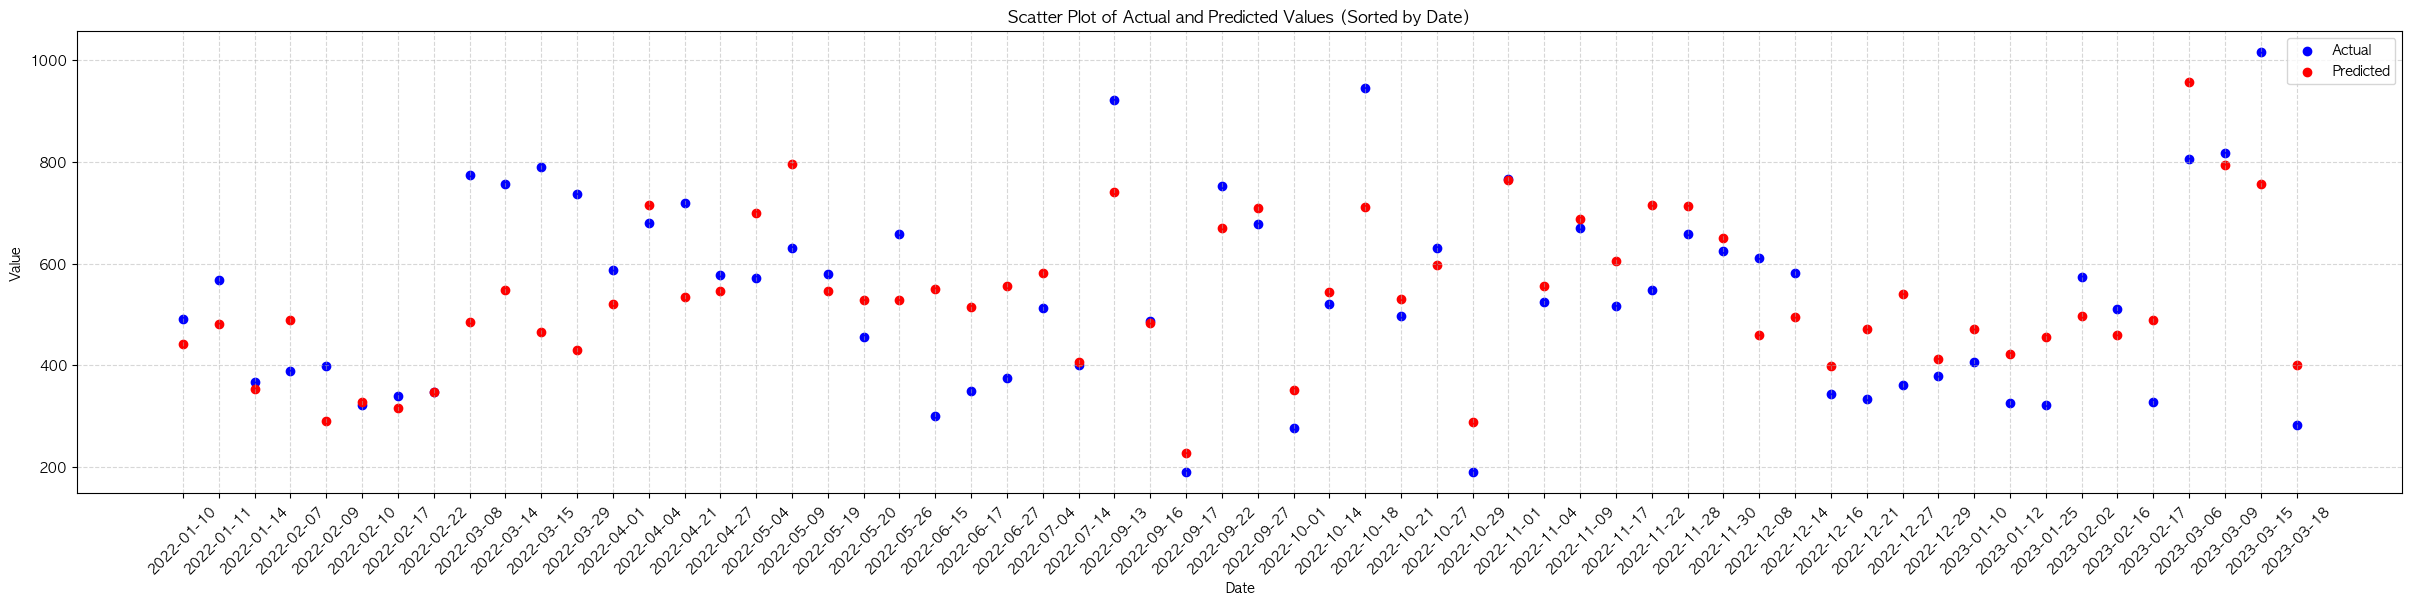

In [256]:
# 날짜 데이터 추출
dates = X_test['날짜']

# 실제 값과 예측 값 추출
actual_values = y_test.values
predicted_values = y_pred

# 데이터프레임 생성
df = pd.DataFrame({'Date': dates, 'Actual': actual_values, 'Predicted': predicted_values})

# 날짜 기준으로 데이터 정렬
df_sorted = df.sort_values('Date')

# 정렬된 데이터에서 날짜, 실제 값, 예측 값 추출
sorted_dates = df_sorted['Date']
sorted_actual_values = df_sorted['Actual']
sorted_predicted_values = df_sorted['Predicted']

# 산점도 그리기
plt.figure(figsize=(30, 6))
plt.scatter(sorted_dates, sorted_actual_values, color='blue', label='Actual')
plt.scatter(sorted_dates, sorted_predicted_values, color='red', label='Predicted')

# 축과 제목 설정
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Actual and Predicted Values (Sorted by Date)')

# 격자 추가
plt.grid(axis='both', linestyle='--', alpha=0.5)

# x축 레이블 자동으로 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


# 2. 디시전트리

In [257]:
# 특성과 타겟 데이터 분리
X = data[['요일', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차', '평균 이동인구']]
y = data['합계']

# 훈련 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 디시전 트리 모델 생성 및 훈련
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

In [258]:
y_pred

array([1077.,  240.,  652.,  546.,  323.,  244.,  627.,  943.,  677.,
        702.,  563.,  369.,  864.,  559.,  511.,  786.,  854.,  307.,
        499.,  405.,  882.,  706.,  632.,  555.,  555.,  336.,  628.,
        201.,  694.,  971.,  500.,  451.,  344.,  410.,  709.,  702.,
        677.,  351.,  430.,  704.,  677.,  778.,  191.,  476.,  983.,
        362.,  342.,  714.,  470.,  671.,  419.,  882.,  377.,  448.,
        410.,  307.,  786.,  287.,  470.,  702.])

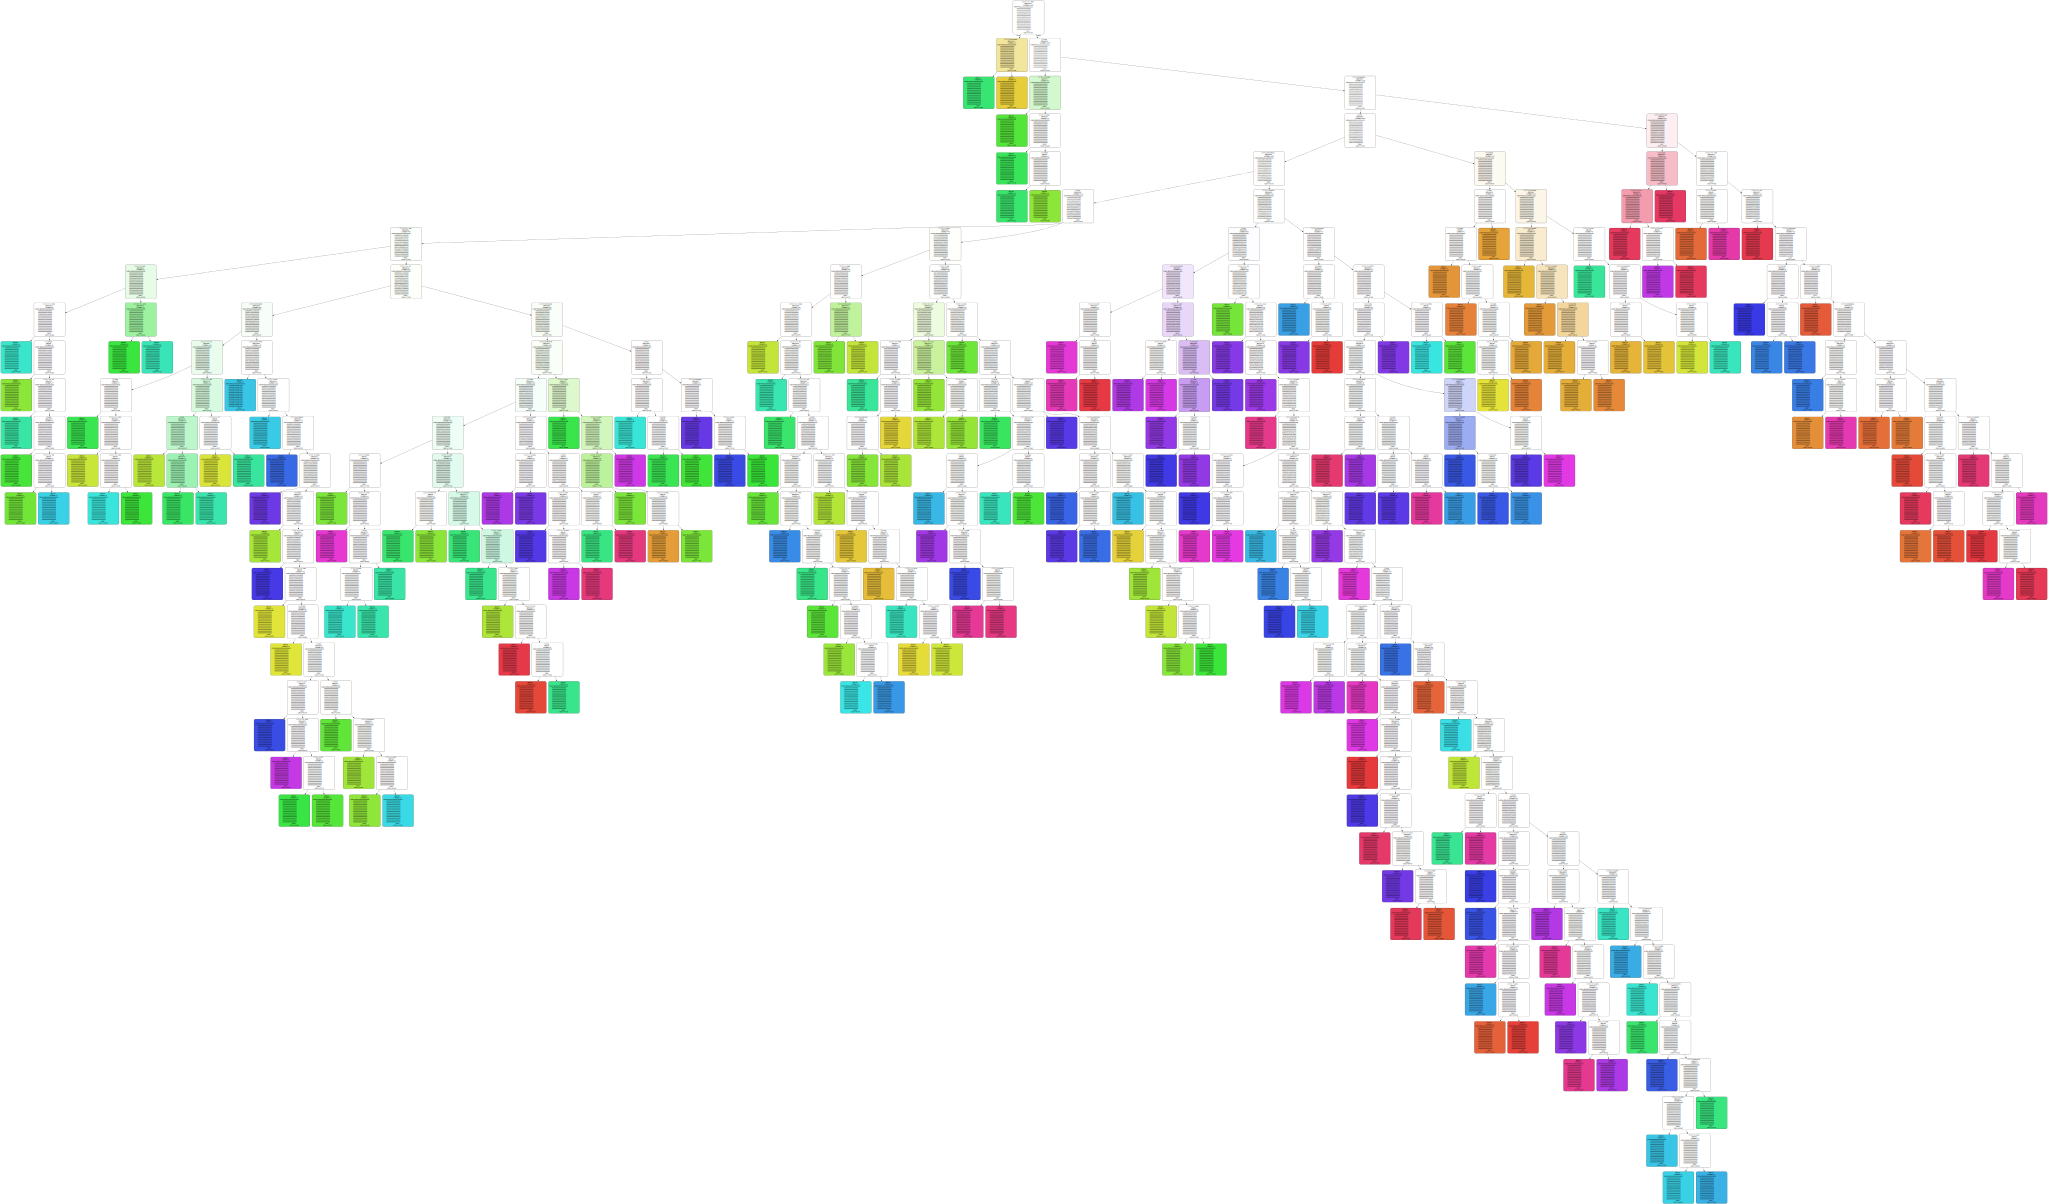

In [259]:

# 특성과 타겟 데이터 분리
X = data[['요일', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차', '평균 이동인구']]
y = data['합계']

# 훈련 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 디시전 트리 모델 생성 및 훈련
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 디시전 트리 시각화
dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, class_names=data['합계'].astype(str).unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree')  # 결과를 파일로 저장
graph

In [260]:

# 합계 값을 100으로 나눈 정수값으로 합계_binned 컬럼 업데이트
data['합계_binned'] = (data['합계'] // 100).astype(int)


In [261]:

# 특성 변수와 타겟 변수 분리
X = data[['요일', '평균기온(℃)', '최저기온(℃)', '평균 이동인구','월','주차']]
y = data['합계_binned']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델을 생성하고 훈련 세트로 학습시킵니다.
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 수행합니다.
y_pred = model.predict(X_test)

# 정확도를 평가합니다.
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.48333333333333334


In [262]:

# 합계 값을 100으로 나눈 정수값으로 합계_binned 컬럼 업데이트
data['합계_binned'] = ((data['합계'] // 10)*10).astype(int)


In [263]:


# 특성 변수와 타겟 변수 분리
X = data[['요일', '평균기온(℃)', '최저기온(℃)', '평균 이동인구','월','주차']]
y = data['합계_binned']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 생성
model = DecisionTreeClassifier( random_state=42)
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 수행합니다.
y_pred = model.predict(X_test)

# 정확도를 평가합니다.

mse = mean_squared_error(y_test, y_pred)
print('Mean squared Error:', mse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
# dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, class_names=data['합계_binned'].astype(str).unique(), filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data)
# graph.render('decision_tree')  # 결과를 파일로 저장
# graph

Accuracy: 0.05
Mean squared Error: 15206.666666666666
Mean Absolute Error: 94.33333333333333


In [264]:
# 특성 변수와 타겟 변수 분리
X = data[['요일', '최저기온(℃)','평균 이동인구','월','주차']]
y = data['합계_binned']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 생성
model = DecisionTreeClassifier( random_state=42)
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 수행합니다.
y_pred = model.predict(X_test)

# 정확도를 평가합니다.

mse = mean_squared_error(y_test, y_pred)
print('Mean squared Error:', mse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Accuracy: 0.03333333333333333
Mean squared Error: 13323.333333333334
Mean Absolute Error: 91.66666666666667


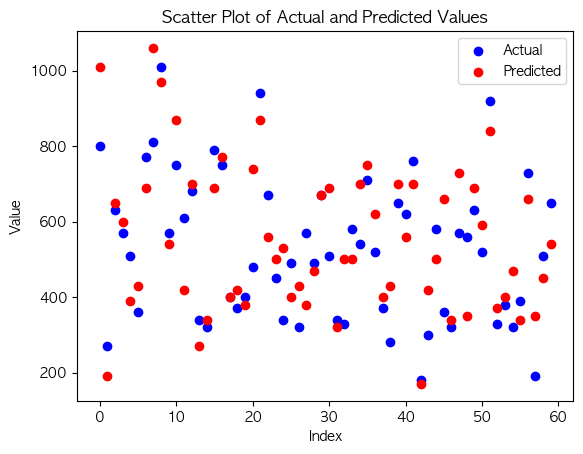

In [265]:

# 실제 값과 예측 값 추출
actual_values = y_test.values
predicted_values = y_pred

# 산점도 그리기
plt.scatter(range(len(actual_values)), actual_values, color='blue', label='Actual')
plt.scatter(range(len(predicted_values)), predicted_values, color='red', label='Predicted')

# 축과 제목 설정
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Actual and Predicted Values')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


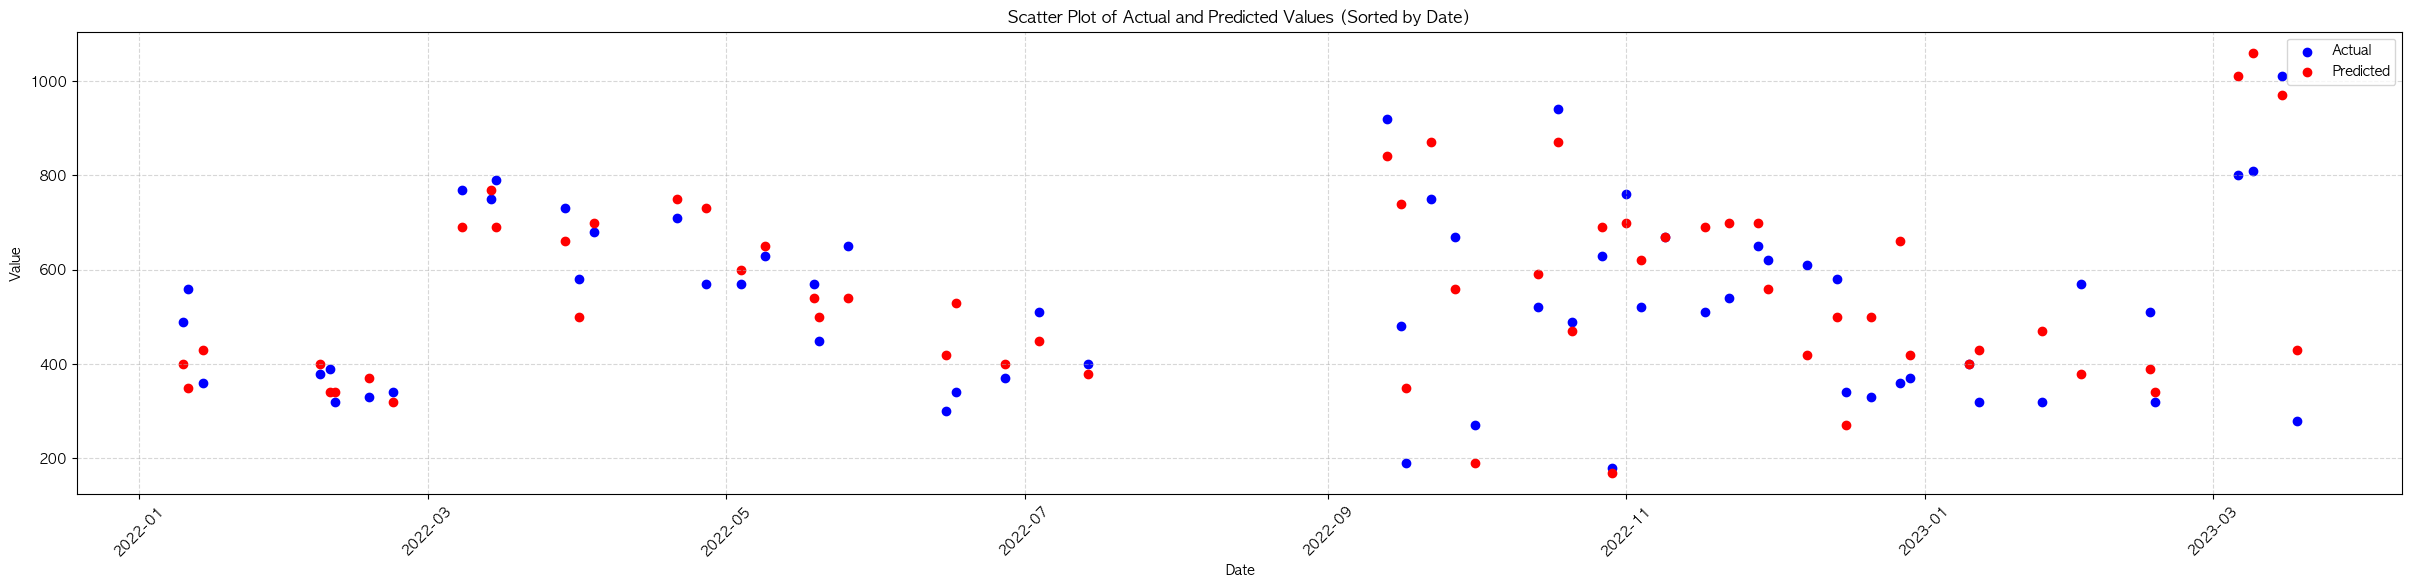

In [266]:
# 날짜 데이터 추출
dates = data.loc[X_test.index, '날짜']


df = pd.DataFrame({'Date': dates, 'Actual': y_test.values, 'Predicted':  y_pred})
df_sorted = df.sort_values('Date')
# 정렬된 데이터에서 날짜, 실제 값, 예측 값 추출
sorted_dates = df_sorted['Date']
sorted_actual_values = df_sorted['Actual']
sorted_predicted_values = df_sorted['Predicted']

# 산점도 그리기
plt.figure(figsize=(30, 6))
plt.scatter(sorted_dates, sorted_actual_values, color='blue', label='Actual')
plt.scatter(sorted_dates, sorted_predicted_values, color='red', label='Predicted')

# 축과 제목 설정
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Actual and Predicted Values (Sorted by Date)')

# 격자 추가
plt.grid(axis='both', linestyle='--', alpha=0.5)

# x축 레이블 자동으로 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


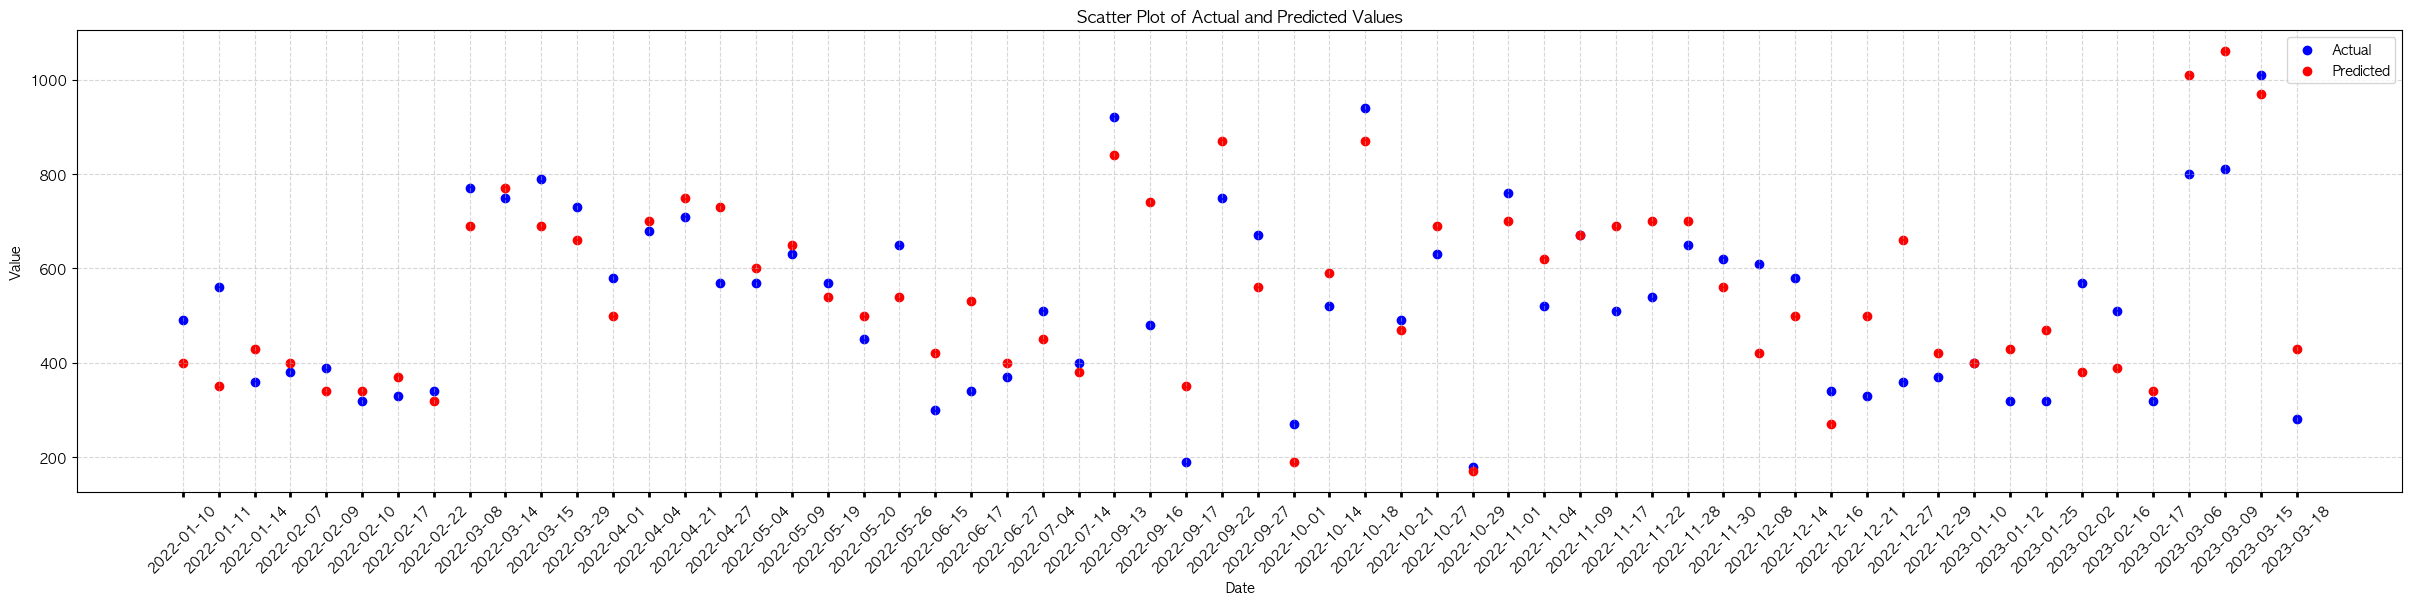

In [267]:
# 날짜 데이터 추출
dates = data.loc[y_test.index, '날짜']
dates =  dates.astype(str)
# 실제 값과 예측 값 추출
actual_values = y_test.values
predicted_values = y_pred

# 데이터프레임 생성
df = pd.DataFrame({'Date': dates, 'Actual': actual_values, 'Predicted': predicted_values})
df_sorted = df.sort_values('Date')
# 산점도 그리기
plt.figure(figsize=(30, 6))
plt.scatter(df_sorted['Date'], df_sorted['Actual'], color='blue', label='Actual')
plt.scatter(df_sorted['Date'], df_sorted['Predicted'], color='red', label='Predicted')

# 축과 제목 설정
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Actual and Predicted Values')

# 격자 추가
plt.grid(axis='both', linestyle='--', alpha=0.5)

# x축 레이블 자동으로 회전
plt.xticks(dates,rotation=45)
plt.tick_params(axis='x', width = 2)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


# 3. 시계열 분석

In [268]:
len(data)

296

In [303]:
# 데이터 정렬
data = data.sort_values('날짜')
data_for_time = data[:-20]
data_for_pre = data[-21:]
# '합계' 열을 시계열 데이터로 선택
ts_data = data_for_time[['날짜', '합계']]

# DateTime 형식을 인덱스로 설정
ts_data.set_index('날짜', inplace=True)


In [296]:
data_for_time

,날짜,합계,요일,평균기온(℃),최고기온(℃),최저기온(℃),일교차,대상연월,평균 이동인구,월,주차,합계_binned
0,2022-01-03,451.0,0,-1.9,2.5,-8.0,10.5,202201,39858,1,1,450
1,2022-01-04,507.0,1,-2.5,1.0,-5.6,6.6,202201,43309,1,1,500
2,2022-01-05,448.0,2,-2.8,1.9,-7.8,9.7,202201,42983,1,1,440
3,2022-01-06,499.0,3,-2.2,3.3,-5.9,9.2,202201,43727,1,1,490
4,2022-01-07,354.0,4,-1.6,4.5,-5.9,10.4,202201,44631,1,1,350
...,...,...,...,...,...,...,...,...,...,...,...,...
272,2023-03-02,851.0,3,2.2,6.6,-1.8,8.4,202303,61414,3,9,850
273,2023-03-03,749.0,4,4.6,10.4,-1.9,12.3,202303,60030,3,9,740
274,2023-03-04,430.0,5,7.7,14.1,3.7,10.4,202303,50149,3,9,430
275,2023-03-06,806.0,0,9.2,16.5,2.2,14.3,202303,61604,3,10,800


In [297]:
# ARIMA 모델 학습 및 예측
model = ARIMA(ts_data, order=(26, 0, 24))  # ARIMA(p, d, q) 값 설정
model_fit = model.fit()
forecast = model_fit.predict(start=len(ts_data), end=len(ts_data) + 20) 

# 예측 결과 출력
forecast

/Users/hanyoungwook/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hanyoungwook/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hanyoungwook/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hanyoungwook/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-statio

276    811.914590
277    812.315923
278    556.568181
279    628.209999
280    722.283439
281    855.674870
282    738.397054
283    663.519587
284    626.748452
285    674.628987
286    794.612883
287    856.103069
288    600.893978
289    632.655638
290    686.848067
291    684.822189
292    756.768209
293    757.140301
294    567.908121
295    785.728368
296    768.587530
Name: predicted_mean, dtype: float64

In [300]:
forecast_pd =pd.DataFrame(forecast)
forecast_pd

,predicted_mean
276,811.914590
277,812.315923
278,556.568181
279,628.209999
280,722.283439
281,855.674870
282,738.397054
283,663.519587
284,626.748452
285,674.628987


In [305]:
data_for_pre = data_for_pre[['날짜','합계']]

In [306]:
data_for_pre

,날짜,합계
276,2023-03-07,1061.0
277,2023-03-08,971.0
278,2023-03-09,817.0
279,2023-03-10,567.0
280,2023-03-11,456.0
281,2023-03-13,1015.0
282,2023-03-14,943.0
283,2023-03-15,1016.0
284,2023-03-16,969.0
285,2023-03-17,560.0


In [308]:
data_for_pre_act = pd.concat([data_for_pre ,forecast_pd],axis=1)
data_for_pre_act

,날짜,합계,predicted_mean
276,2023-03-07,1061.0,811.914590
277,2023-03-08,971.0,812.315923
278,2023-03-09,817.0,556.568181
279,2023-03-10,567.0,628.209999
280,2023-03-11,456.0,722.283439
281,2023-03-13,1015.0,855.674870
282,2023-03-14,943.0,738.397054
283,2023-03-15,1016.0,663.519587
284,2023-03-16,969.0,626.748452
285,2023-03-17,560.0,674.628987


In [311]:
mse = mean_squared_error(data_for_pre_act['합계'], data_for_pre_act['predicted_mean'])
print('Mean squared Error:', mse)
mae = mean_absolute_error(data_for_pre_act['합계'], data_for_pre_act['predicted_mean'])
print('Mean Absolute Error:', mae)

Mean squared Error: 70055.00542833137
Mean Absolute Error: 232.63437988729453


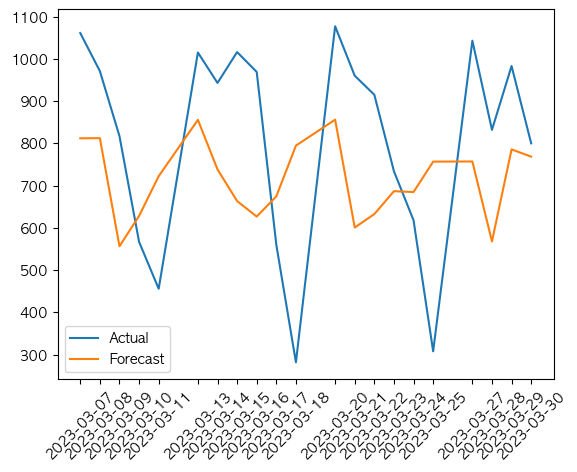

In [314]:
plt.plot(data_for_pre_act['날짜'],data_for_pre_act['합계'], label='Actual')
plt.plot(data_for_pre_act['날짜'],data_for_pre_act['predicted_mean'], label='Forecast')
plt.xticks(data_for_pre_act['날짜'],rotation=45)
plt.legend()
plt.show()

# 4. 트리 앙상블

In [290]:

# 특성과 타겟 나누기
X = data.drop(['날짜','합계','합계_binned'], axis=1)
y = data['합계']

# 특성 숫자형 변환 (예: 요일은 원핫 인코딩)
X = pd.get_dummies(X)

# 훈련 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Squared Error: 8306.310241666666
Mean Absolute Error: 71.1455


In [285]:
X_train

,요일,평균기온(℃),최고기온(℃),최저기온(℃),일교차,대상연월,평균 이동인구,월,주차
63,3,10.9,15.7,7.4,8.3,202204,52450,4,14
17,2,1.3,6.8,-1.9,8.7,202201,42983,1,4
216,1,0.0,3.1,-6.4,9.5,202212,51748,12,50
220,5,-7.0,-3.2,-9.8,6.6,202212,44037,12,50
184,5,6.5,13.6,0.8,12.8,202211,48786,11,44
...,...,...,...,...,...,...,...,...,...
189,4,15.6,22.1,10.9,11.2,202211,56173,11,45
71,1,15.2,22.1,8.9,13.2,202204,52493,4,16
106,2,21.2,25.8,16.2,9.6,202206,51346,6,23
271,1,4.3,8.7,-0.7,9.4,202302,48294,2,9


In [292]:
# 첫 번째 결정 트리 추출
estimator = model.estimators_[0]

# 결정 트리 시각화
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded=True,
                                feature_names=X_train.columns)
graph = graphviz.Source(dot_data)
#graph.render("random_forest_tree")  # 그래프를 파일로 저장
graph.view()  # 그래프 시각화

'Source.gv.pdf'

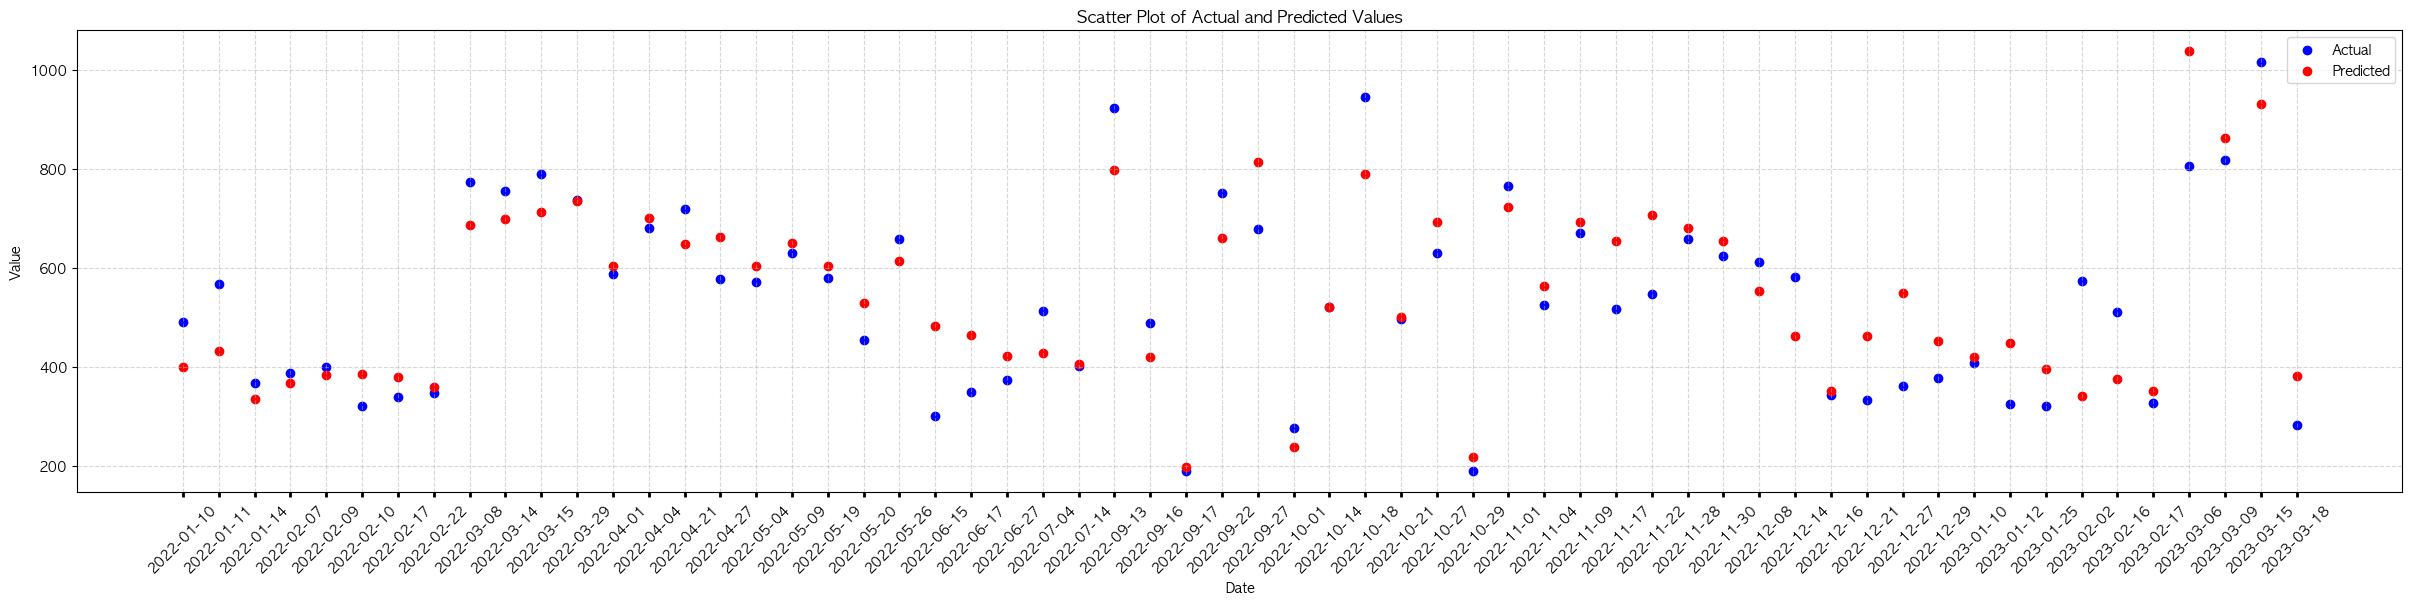

In [291]:
# 날짜 데이터 추출
dates = data.loc[y_test.index, '날짜']
dates =  dates.astype(str)
# 실제 값과 예측 값 추출
actual_values = y_test.values
predicted_values = y_pred

# 데이터프레임 생성
df = pd.DataFrame({'Date': dates, 'Actual': actual_values, 'Predicted': predicted_values})
df_sorted = df.sort_values('Date')
# 산점도 그리기
plt.figure(figsize=(30, 6))
plt.scatter(df_sorted['Date'], df_sorted['Actual'], color='blue', label='Actual')
plt.scatter(df_sorted['Date'], df_sorted['Predicted'], color='red', label='Predicted')

# 축과 제목 설정
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Actual and Predicted Values')

# 격자 추가
plt.grid(axis='both', linestyle='--', alpha=0.5)

# x축 레이블 자동으로 회전
plt.xticks(dates,rotation=45)
plt.tick_params(axis='x', width = 2)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


In [293]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

# 개별 랜덤 포레스트 모델 생성
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = RandomForestRegressor(n_estimators=100, random_state=123)
model3 = RandomForestRegressor(n_estimators=100, random_state=456)

# 보팅 앙상블 모델 생성
ensemble_model = VotingRegressor([('model1', model1), ('model2', model2), ('model3', model3)])

# 앙상블 모델 학습
ensemble_model.fit(X_train, y_train)

# 앙상블 모델 예측
predictions = ensemble_model.predict(X_test)


# 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Squared Error: 8306.310241666666
Mean Absolute Error: 71.1455


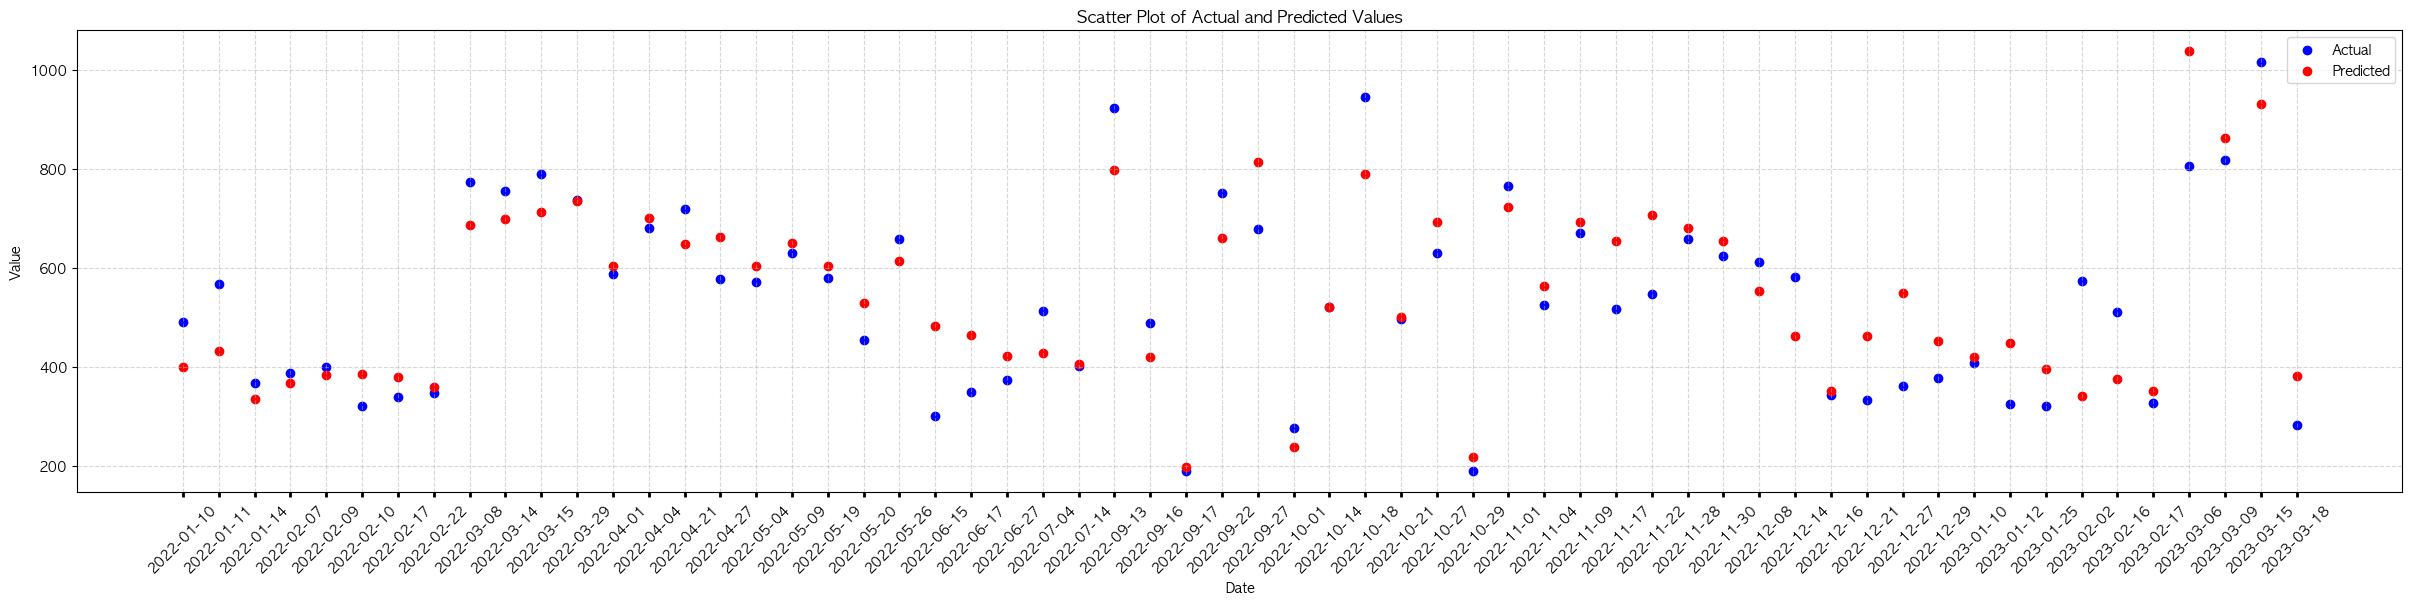

In [294]:
# 날짜 데이터 추출
dates = data.loc[y_test.index, '날짜']
dates =  dates.astype(str)
# 실제 값과 예측 값 추출
actual_values = y_test.values
predicted_values = y_pred

# 데이터프레임 생성
df = pd.DataFrame({'Date': dates, 'Actual': actual_values, 'Predicted': predicted_values})
df_sorted = df.sort_values('Date')
# 산점도 그리기
plt.figure(figsize=(30, 6))
plt.scatter(df_sorted['Date'], df_sorted['Actual'], color='blue', label='Actual')
plt.scatter(df_sorted['Date'], df_sorted['Predicted'], color='red', label='Predicted')

# 축과 제목 설정
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Actual and Predicted Values')

# 격자 추가
plt.grid(axis='both', linestyle='--', alpha=0.5)

# x축 레이블 자동으로 회전
plt.xticks(dates,rotation=45)
plt.tick_params(axis='x', width = 2)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()